## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 讀取 Boston
boston = datasets.load_boston()

print(f'boston.data.shape = {boston.data.shape}')
print(boston.DESCR)

boston.data.shape = (506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per

In [4]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [5]:
print(regr.coef_)

[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [6]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


### LASSO

In [55]:
# 讀取 Boston 房價資料集
diabetes = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=0.0001)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [56]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([-1.15948981e-01,  4.71276533e-02,  8.11640297e-03,  3.23167956e+00,
       -1.66536994e+01,  3.88420319e+00, -1.09223065e-02, -1.54076817e+00,
        2.93126716e-01, -1.34080588e-02, -9.05962921e-01,  8.80978043e-03,
       -4.57776731e-01])

In [57]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


In [58]:
# alpha 取值为10^（-4）到10^（0）之间的连续的100个值
n_alphas = 100
alphas = np.logspace(-4, 0, n_alphas)
print(f'\n alpha的值为：{alphas}')


 alpha的值为：[1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e-04
 9.32603347e-04 1.02353102e-03 1.12332403e-03 1.23284674e-03
 1.35304777e-03 1.48496826e-03 1.62975083e-03 1.78864953e-03
 1.96304065e-03 2.15443469e-03 2.36448941e-03 2.59502421e-03
 2.84803587e-03 3.12571585e-03 3.43046929e-03 3.76493581e-03
 4.13201240e-03 4.53487851e-03 4.97702356e-03 5.46227722e-03
 5.99484250e-03 6.57933225e-03 7.22080902e-03 7.92482898e-03
 8.69749003e-03 9.54548457e-03 1.04761575e-02 1.14975700e-02
 1.26185688e-02 1.38488637e-02 1.51991108e-02 1.66810054e-02
 1.83073828e-02 2.00923300e-02 2.20513074e-02 2.42012826e-02
 2.65608778e-02 2.91505306e-02 3.19926714e-02 3.51119173e-02
 3.85352859e-

C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

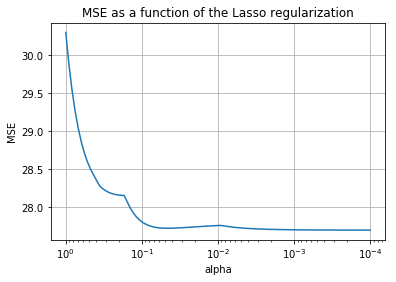

In [59]:
# 初始化一个 Lasso Regression
clf = linear_model.Lasso(fit_intercept=False)

# 参数矩阵，即每一个alpha对于的参数所组成的矩阵
mses = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    

# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alphas, mses)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE as a function of the Lasso regularization')
plt.axis('tight')
plt.show()


### Ridge

In [70]:
# 讀取 Boston 資料集
diabetes = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=0.0001)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [71]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[-1.15965819e-01  4.71250599e-02  8.25398833e-03  3.23400567e+00
 -1.66852787e+01  3.88411731e+00 -1.08986300e-02 -1.54127620e+00
  2.93204980e-01 -1.34060194e-02 -9.06282803e-01  8.80829668e-03
 -4.57725181e-01]


In [72]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


In [73]:
# alpha 取值为 10^（-4）到 10^（0）之间的连续的 100个值
n_alphas = 100
alphas = np.logspace(-4, 0, n_alphas)
print(f'\n alpha的值为：{alphas}')


 alpha的值为：[1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e-04
 9.32603347e-04 1.02353102e-03 1.12332403e-03 1.23284674e-03
 1.35304777e-03 1.48496826e-03 1.62975083e-03 1.78864953e-03
 1.96304065e-03 2.15443469e-03 2.36448941e-03 2.59502421e-03
 2.84803587e-03 3.12571585e-03 3.43046929e-03 3.76493581e-03
 4.13201240e-03 4.53487851e-03 4.97702356e-03 5.46227722e-03
 5.99484250e-03 6.57933225e-03 7.22080902e-03 7.92482898e-03
 8.69749003e-03 9.54548457e-03 1.04761575e-02 1.14975700e-02
 1.26185688e-02 1.38488637e-02 1.51991108e-02 1.66810054e-02
 1.83073828e-02 2.00923300e-02 2.20513074e-02 2.42012826e-02
 2.65608778e-02 2.91505306e-02 3.19926714e-02 3.51119173e-02
 3.85352859e-

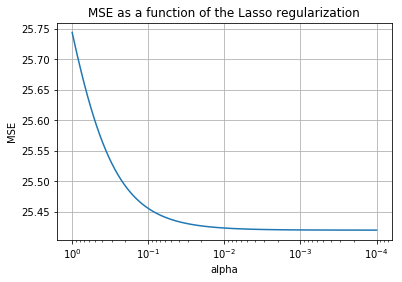

In [74]:
# 初始化一个 Ridge Regression
clf = linear_model.Ridge()
#clf = linear_model.Ridge(fit_intercept=False) <= Note This will descrease MSE a lot ..., why ?

# 参数矩阵，即每一个alpha对于的参数所组成的矩阵
mses = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    

# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alphas, mses)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE as a function of the Lasso regularization')
plt.axis('tight')
plt.show()


看起來 LASSO 與 Ridge 的結果最好的結果與線性回歸差不多，

這是因為目標函數被加上了正規化函數，讓模型不能過於複雜，相當於限制模型擬和資料的能力。`因此若沒有發現 Over-fitting 的情況，是可以不需要一開始就加上太強的正規化的。`